# initialization

## 1.1 Import Important Lib

In [148]:
#Libraries for data manipulation
import pandas as pd 
import numpy as np 
from collections import defaultdict

#visualization
import matplotlib.pyplot as pltf 
import seaborn as sns 
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#classification algorithms testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

#library for create the final report
from sklearn.metrics import classification_report


pltf.style.use('fivethirtyeight')

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1.2 Importing Data And Exploring

In [149]:
data = pd.read_csv(r'C:\Users\96650\Desktop\Project\data\googleplaystore.csv') ## Import Data

In [150]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [152]:
data.shape

(10841, 13)

# Preprocessing

## 2.1 Handle Null Values and Drop Duplicates

In [153]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [154]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


In [155]:
data[data['Rating'].isna() == 1] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [156]:
#  We have null values in the "Rating,", "Current Ver", "Android Ver", "Content Rating," and "Last Update". so we need to handle them
# Cleaning missing values using Random Value using the Median -- Best Way --
def impute_median(series):
    return series.fillna(series.median())

data['Rating'] = data['Rating'].transform(impute_median)

In [157]:
# We will replace the Null or NaN Content Rating with an empty text value because it will have no impact.
data['Content Rating'] = data['Content Rating'].fillna('')

In [158]:
# And delete the rest of the lines that contain Null Values
data = data.dropna(axis=0)

In [159]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [160]:
## Check duplicated Row
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10829, dtype: bool

## 2.2 C- Modify Columns, Datatype, Data

In [161]:
# Making the "installs" column a numeric value and remove the "+"
data = data[~data['Installs'].str.contains('Free')]
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# Converting the values in the application size column to numeric values representing the size in megabytes.
# Remove all characters
# convert it to float.
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

#  Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

data = data.rename(columns={"Size": "Size(megabytes)"}) ## Change The Columns Name 

#Column after Replacing "Varies with device" with the Median in a Single Line
def impute_median(series):
    return series.fillna(series.median())

data['Size(megabytes)'] = data['Size(megabytes)'].transform(impute_median)

# Converting the "last updated" column to the date type from the Pandas library, and split it into two column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year
data.drop('Last Updated', axis=1, inplace=True) # Delete Last Updated Column !
data.head()

,App,Category,Rating,Reviews,Size(megabytes),Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


### One-Hot Encoding

In [162]:
# Converting "Reviews" and "Price" to Numeric Type
data['Reviews'] = data['Reviews'].astype(int)
unique_values = data['Price'].unique()

# Remove the dollar sign ($) from the "Price" column
data['Price'] = data['Price'].str.replace('$', '')

# Convert the "Price($)" column to float
data['Price'] = data['Price'].astype(float)

data.rename(columns={'Price': 'Price($)'}, inplace=True)

## "Since the goal is to determine the success of the project,
##we will consider any application that has received a rating of 4 stars or less as unsuccessful. Therefore, we will replace the rating column."

# Determine success based on the Rating column
data['Success'] = data['Rating'].apply(lambda x: 1 if x > 4 else 0)

# Drop the original Rating column if no longer needed
data.drop(columns=['Rating'], inplace=True)


data.head()

,App,Category,Reviews,Size(megabytes),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year,Success
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018,1
1,Coloring book moana,ART_AND_DESIGN,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018,1


### Important graphs

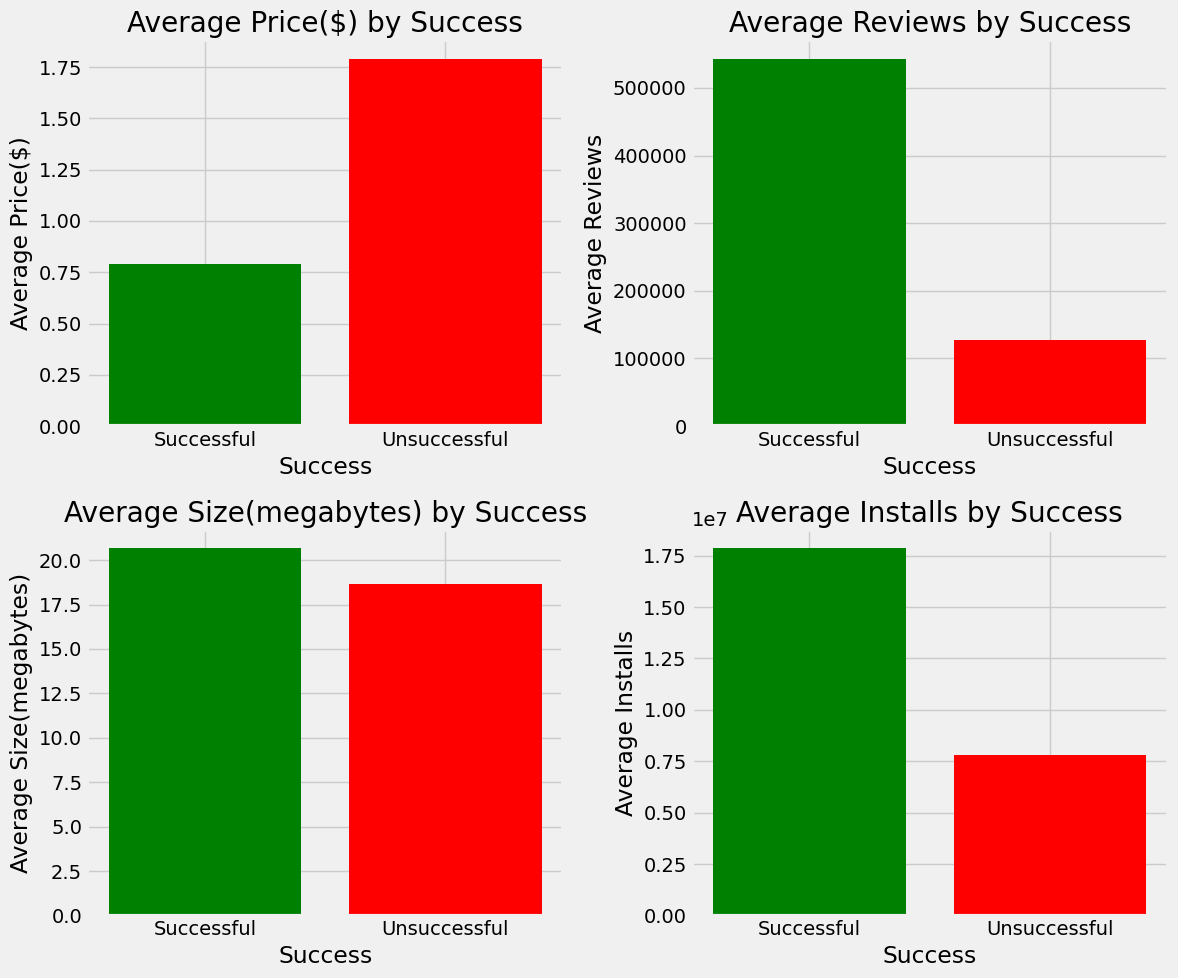

In [163]:
# Filter successful and unsuccessful apps
successful_apps = data[data['Success'] == 1]
unsuccessful_apps = data[data['Success'] == 0]

# Select numeric columns
numeric_cols = ['Reviews', 'Size(megabytes)', 'Installs', 'Price($)']

# Calculate mean for each column separately
success_mean = successful_apps[numeric_cols].mean()
unsuccess_mean = unsuccessful_apps[numeric_cols].mean()

# Plotting the data
fig, axes = pltf.subplots(2, 2, figsize=(12, 10))

# Price
axes[0, 0].bar(['Successful', 'Unsuccessful'], [success_mean['Price($)'], unsuccess_mean['Price($)']], color=['green', 'red'])
axes[0, 0].set_title('Average Price($) by Success')
axes[0, 0].set_ylabel('Average Price($)')
axes[0, 0].set_xlabel('Success')

# Reviews
axes[0, 1].bar(['Successful', 'Unsuccessful'], [success_mean['Reviews'], unsuccess_mean['Reviews']], color=['green', 'red'])
axes[0, 1].set_title('Average Reviews by Success')
axes[0, 1].set_ylabel('Average Reviews')
axes[0, 1].set_xlabel('Success')

# Size
axes[1, 0].bar(['Successful', 'Unsuccessful'], [success_mean['Size(megabytes)'], unsuccess_mean['Size(megabytes)']], color=['green', 'red'])
axes[1, 0].set_title('Average Size(megabytes) by Success')
axes[1, 0].set_ylabel('Average Size(megabytes)')
axes[1, 0].set_xlabel('Success')

# Installs
axes[1, 1].bar(['Successful', 'Unsuccessful'], [success_mean['Installs'], unsuccess_mean['Installs']], color=['green', 'red'])
axes[1, 1].set_title('Average Installs by Success')
axes[1, 1].set_ylabel('Average Installs')
axes[1, 1].set_xlabel('Success')

pltf.tight_layout()
pltf.show()


# Data mining stage

## 3.1 Data Splitting for Modeling

In [164]:
target = 'Success'
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver'] # Non-targeted columns
X = data.copy().drop(pruned_features+[target], axis=1) # table containing non-target columns
y = data.copy()[target] # A table containing a targeted results column

#Separate the target results table and the non-target results table into two groups for Test set and Train set (Randomly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) # Test set 20%, Train set 80%

## 3.2 Label Encoding and Standardization

In [165]:
# Convert text data in the "categories", "Content Rating", "Type" columns into numbers
le_dict = defaultdict()
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns 

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

#classification algorithms deal with deterministic data belonging to a possible set of values, this is more beneficial for classification algorithms.
#Converting the Rating from continuous to discrete 
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

models = ['Naive Bayes', 'KNN', 'Random Forest', 'Iterative Dichotomiser 3']
datasets = ['train', 'test']

# MultiIndex for DataFrame for Accuracy Result
multi_index = pd.MultiIndex.from_product([models, datasets], names=['model', 'dataset'])

# Initialize DataFrame with MultiIndex
df_metrics_clf_acc = pd.DataFrame(index=multi_index, columns=['Accuracy %'])


models = ['Naive Bayes', 'KNN', 'Random Forest', 'Iterative Dichotomiser 3']
datasets = ['train', 'test']

# MultiIndex for DataFrame for AUC Result
multi_index = pd.MultiIndex.from_product([models, datasets], names=['model', 'dataset'])

# Initialize DataFrame with MultiIndex
df_metrics_clf_auc = pd.DataFrame(index=multi_index, columns=['AUC'])


## 3.3 KNN classification

In [166]:
# model Initializing
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)
# Accuracy Calculating
df_metrics_clf_acc.loc[('KNN', 'train'), 'Accuracy %'] = knn_clf.score(X_train, y_train_int) * 100
df_metrics_clf_acc.loc[('KNN', 'test'), 'Accuracy %'] = knn_clf.score(X_test, y_test_int) * 100
# AUC Calculating
y_pred_knn_clf = knn_clf.predict_proba(X_test)[:, 1]
knn_clf_fpr, knn_clf_tpr, _ = roc_curve(y_test_int, y_pred_knn_clf)
auc_knn_clf = auc(knn_clf_fpr, knn_clf_tpr)
df_metrics_clf_auc.loc['KNN', 'AUC'] = round(auc_knn_clf, 2)


## 3.4 Naive Bayes

In [167]:
# model Initializing
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train_int)

# Accuracy Calculating
df_metrics_clf_acc.loc[('Naive Bayes', 'train'), 'Accuracy %'] = nb_clf.score(X_train, y_train_int) * 100
df_metrics_clf_acc.loc[('Naive Bayes', 'test'), 'Accuracy %'] = nb_clf.score(X_test, y_test_int)* 100

# AUC Calculating
y_pred_nb_clf = nb_clf.predict_proba(X_test)[:, 1]
nb_clf_fpr, nb_clf_tpr, _ = roc_curve(y_test_int, y_pred_nb_clf)
auc_nb_clf = auc(nb_clf_fpr, nb_clf_tpr)
df_metrics_clf_auc.loc['Naive Bayes', 'AUC'] = round(auc_nb_clf, 2)


## 3.4 Random Forest

In [168]:
# model Initializing
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

# Accuracy Calculating
df_metrics_clf_acc.loc[('Random Forest', 'train'), 'Accuracy %'] = rf_clf.score(X_train, y_train_int)* 100
df_metrics_clf_acc.loc[('Random Forest', 'test'), 'Accuracy %'] = rf_clf.score(X_test, y_test_int)* 100

# AUC Calculating
y_pred_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
rf_clf_fpr, rf_clf_tpr, _ = roc_curve(y_test_int, y_pred_rf_clf)
auc_rf_clf = auc(rf_clf_fpr, rf_clf_tpr)
df_metrics_clf_auc.loc['Random Forest', 'AUC'] = round(auc_rf_clf, 2)

## 3.5 Iterative Dichotomiser 3

In [169]:
# model Initializing
id3_clf = DecisionTreeClassifier(criterion='entropy')
id3_clf.fit(X_train, y_train_int)

# Accuracy Calculating
df_metrics_clf_acc.loc[('Iterative Dichotomiser 3', 'train'), 'Accuracy %'] = accuracy_score(y_train_int, id3_clf.predict(X_train))* 100
df_metrics_clf_acc.loc[('Iterative Dichotomiser 3', 'test'), 'Accuracy %'] = accuracy_score(y_test_int, id3_clf.predict(X_test))* 100

# AUC Calculating
y_pred_id3 = id3_clf.predict_proba(X_test)[:, 1]
id3_fpr, id3_tpr, _ = roc_curve(y_test_int, y_pred_id3)
auc_id3 = auc(id3_fpr, id3_tpr)
df_metrics_clf_auc.loc['Iterative Dichotomiser 3', 'AUC'] = round(auc_id3, 2)

df_metrics_clf_acc

Accuracy %
model                    dataset           
Naive Bayes              train    75.216438
                         test     75.023084
KNN                      train    81.345954
                         test     72.068329
Random Forest            train    99.988457
                         test     77.562327
Iterative Dichotomiser 3 train    99.988457
                         test     73.591874

## 3.6 Disply the results of the modeling evaluation

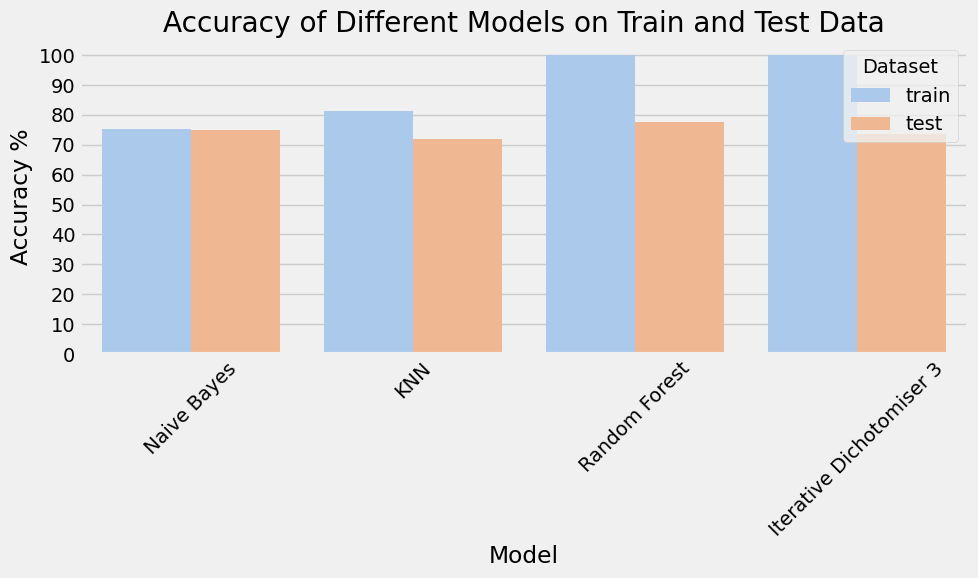

In [170]:
# رسم الرسم البياني
pltf.figure(figsize=(10, 6))
sns.barplot(x='model', y='Accuracy %', hue='dataset', data=df_metrics_clf_acc.reset_index(), palette='pastel')
pltf.title('Accuracy of Different Models on Train and Test Data')
pltf.xlabel('Model')
pltf.ylabel('Accuracy %')
pltf.yticks(range(0, 110, 10))  # تحديد قيم الدقة بالتوالي من 0 إلى 100
pltf.xticks(rotation=45)  # تدوير علامات المحور x
pltf.legend(title='Dataset')
pltf.tight_layout()
pltf.show()

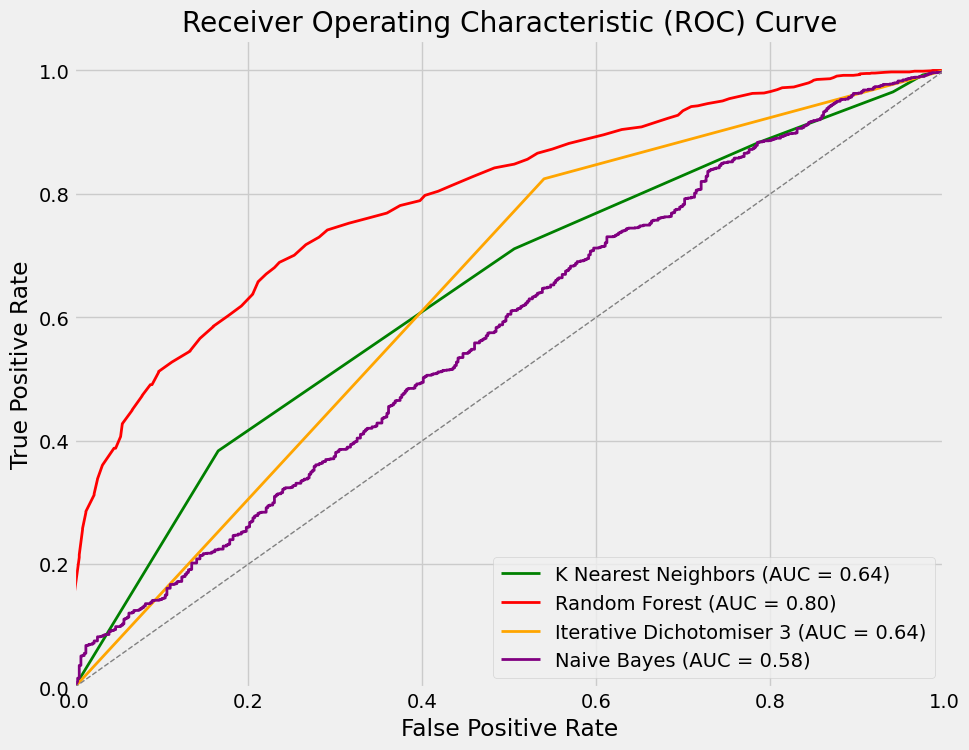

In [171]:
pltf.figure(figsize=(10, 8))
pltf.plot(knn_clf_fpr, knn_clf_tpr, color='green', lw=2, label='K Nearest Neighbors (AUC = %0.2f)' % auc_knn_clf)
pltf.plot(rf_clf_fpr, rf_clf_tpr, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf_clf)
pltf.plot(id3_fpr, id3_tpr, color='orange', lw=2, label='Iterative Dichotomiser 3 (AUC = %0.2f)' % auc_id3)
pltf.plot(nb_clf_fpr, nb_clf_tpr, color='purple', lw=2, label='Naive Bayes (AUC = %0.2f)' % auc_nb_clf)
pltf.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
pltf.xlim([0.0, 1.0])
pltf.ylim([0.0, 1.05])
pltf.xlabel('False Positive Rate')
pltf.ylabel('True Positive Rate')
pltf.title('Receiver Operating Characteristic (ROC) Curve')
pltf.legend(loc="lower right")
pltf.show()